In [2]:
import torch
from torch import nn, Tensor as tensor
from torch.autograd import Variable
from torch.nn import functional as F
from sklearn.model_selection import train_test_split
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
det_w = [[[-0.25652209,  0.36312505,  0.50297704,  0.03195129,  0.29324572,
        -0.02100135,  0.13920005, -0.35125547,  0.38020806, -0.09515929,
         0.09237585, -0.53410421, -0.3420362 , -0.33175471, -0.4136922 ,
         0.2084909 ,  0.41941801,  0.40732817, -0.47433546, -0.12678968]],
      [[-0.06318796,  0.00302302, -0.09039763,  0.01941669, -0.2368743 ,
        -0.37912505,  0.22399492,  0.01547478,  0.01224186,  0.34956225,
         0.22344164, -0.17173258,  0.30551917, -0.0342317 ,  0.02459745,
         0.07925407,  0.17530079,  0.06440081,  0.30720219,  0.02765657],
       [-0.18898558,  0.15661074, -0.00579285, -0.32636315,  0.20534928,
         0.0844091 ,  0.27751618,  0.23400172,  0.12588421,  0.06181568,
         0.17686602, -0.09230035, -0.30968099, -0.07721444,  0.17064844,
        -0.00484039, -0.03775636,  0.05075257,  0.0935504 ,  0.09926275],
       [-0.03376383,  0.30666479, -0.38890897, -0.09933545, -0.12333722,
         0.16590364, -0.03132728,  0.07952964, -0.16949191, -0.39792395,
        -0.15171671,  0.05259545,  0.0451744 , -0.07162394,  0.08826929,
        -0.0486124 ,  0.01836021, -0.16201744, -0.20246294, -0.04153271],
       [ 0.01846698,  0.30099514, -0.20932157,  0.19471238, -0.19426918,
         0.31669812, -0.19093843, -0.35316749,  0.32045369,  0.26446381,
         0.06486828,  0.02067458, -0.28428829, -0.01368291, -0.08322917,
         0.10321219, -0.39804292,  0.01296193,  0.04561304,  0.19500044],
       [-0.16264162, -0.08271117,  0.09912871,  0.27404488,  0.37639088,
        -0.04992609,  0.04322457, -0.21302498,  0.08176452, -0.41786676,
        -0.02227435, -0.22668144, -0.37028117, -0.11318629, -0.15930486,
        -0.04359016, -0.43976692, -0.22915942, -0.03409078, -0.05221637],
       [-0.02634475,  0.16049269,  0.17014225, -0.38095102, -0.11353817,
        -0.22713766, -0.08639127,  0.20184427,  0.1554777 , -0.26390786,
         0.07652292, -0.0421717 , -0.31289176, -0.14124264, -0.32838387,
        -0.0796352 ,  0.42858482, -0.1611772 , -0.13923803, -0.04656965],
       [ 0.33956417, -0.05049457, -0.06247835,  0.18077098, -0.22061906,
         0.08410838,  0.21358096,  0.09818658,  0.23592036, -0.10989835,
         0.29812533,  0.22724109, -0.15238489,  0.24866956,  0.12372893,
         0.12841998, -0.11089174,  0.35833794,  0.0614283 ,  0.09418332],
       [-0.23432735,  0.02434382,  0.05335104, -0.28220913,  0.20042389,
         0.13838178, -0.15469131, -0.10661026, -0.1433293 ,  0.07829964,
         0.18880603, -0.0671457 ,  0.01454967,  0.25900468, -0.25399154,
         0.28596994,  0.26257575, -0.30211789,  0.16396919,  0.07873816],
       [-0.03274823, -0.03858012,  0.03206125, -0.24241644,  0.15901674,
         0.12216682, -0.19940026,  0.29683956,  0.42109092,  0.12443781,
         0.00836645,  0.10299   ,  0.35978566, -0.0925015 ,  0.04281948,
         0.13013598, -0.35863545,  0.01939617,  0.08410215,  0.14897827],
       [ 0.047526  ,  0.0659775 , -0.24318198, -0.19818831,  0.15464595,
        -0.22273993,  0.06334048,  0.10686206,  0.08613301, -0.02175106,
         0.10338281, -0.05261545,  0.03672454, -0.27005162,  0.14315714,
        -0.05062077, -0.11355936, -0.11787303, -0.28143559,  0.12145295],
       [ 0.16192001,  0.08942908, -0.33948314, -0.07308164,  0.21285226,
        -0.18612583,  0.17999331,  0.14035838, -0.26165761,  0.28453496,
        -0.17910197,  0.20875381,  0.13060267, -0.13363141,  0.01268788,
        -0.103795  ,  0.33835487,  0.35515915,  0.0217877 , -0.31857218],
       [-0.08539146, -0.10328664, -0.07399939, -0.04286109, -0.04398707,
         0.27627975,  0.18920575,  0.08684305, -0.06595036,  0.33430623,
         0.12147519, -0.12212395, -0.07413326, -0.09527507,  0.15112816,
        -0.08712893,  0.06851579,  0.25124934,  0.27425812,  0.09145771],
       [-0.23378746, -0.39991367, -0.17474923,  0.36715616,  0.03350508,
         0.12730543,  0.11734865,  0.16855118, -0.08006769,  0.42972332,
        -0.09957109, -0.16820045, -0.06408685,  0.19146808, -0.00227504,
        -0.08194022,  0.25770452, -0.1286547 , -0.14570921, -0.30878258],
       [-0.24052672,  0.00628755, -0.18194738, -0.14718428, -0.16032552,
        -0.06376452, -0.29874477,  0.05299601, -0.23623937, -0.21116012,
         0.1776381 ,  0.31041146,  0.1673923 , -0.03583872,  0.12387178,
         0.14575561,  0.10694735, -0.17194174, -0.18398432,  0.11925319],
       [-0.12937973,  0.08656016, -0.0401875 , -0.06975601,  0.19330837,
         0.11397166,  0.24909725, -0.24134266, -0.03214963,  0.0831356 ,
         0.10857586,  0.02260143,  0.25711655,  0.12151514,  0.00475562,
        -0.04023029, -0.14520732,  0.0939196 , -0.0744837 ,  0.31262563],
       [-0.11947323,  0.15027327, -0.10472735,  0.40042543,  0.03794953,
         0.21419902, -0.14388712, -0.37527237, -0.09483708,  0.42335789,
         0.02698101, -0.09463978,  0.0060675 ,  0.43487459, -0.11558138,
        -0.04099428, -0.23084691, -0.02931889,  0.37760482,  0.11337765],
       [-0.12012254, -0.05976939, -0.05709426,  0.18441771, -0.16982611,
         0.23622091,  0.12512239,  0.13503306, -0.00581311, -0.1578085 ,
         0.15198701, -0.02850477,  0.33750767, -0.38325149,  0.39460327,
         0.19366211,  0.19809897, -0.14440202, -0.24258367, -0.32514655],
       [ 0.00259598, -0.33694428, -0.13770943, -0.18477694,  0.15253142,
         0.43450998, -0.01851686,  0.04059191,  0.15185425,  0.23905287,
        -0.16983109,  0.16460227, -0.30050112,  0.23323005,  0.01195607,
         0.03662585,  0.36831997, -0.1924006 ,  0.10970455, -0.19644297],
       [ 0.01525557, -0.16224014,  0.07985993,  0.37904984, -0.24412092,
        -0.1857126 , -0.16627009,  0.11228946, -0.05642977, -0.2742228 ,
         0.00908814, -0.11555627,  0.25313133,  0.25255243,  0.06174723,
         0.08901661, -0.08540919,  0.11003593,  0.29406497, -0.05913974],
       [-0.27582042, -0.05431555, -0.29536684, -0.02735748, -0.209849  ,
        -0.14608066,  0.00513861,  0.06789119, -0.24255526, -0.12293982,
         0.20190148,  0.06073243,  0.00269514, -0.14368265, -0.09170857,
         0.10654767, -0.06339496, -0.03500548,  0.09293635, -0.00231484]],
      [[-0.2529694 ,  0.01725289, -0.22788602,  0.11708699,  0.15474593,
        -0.17555128, -0.28752385,  0.10876783, -0.14828149,  0.06416313,
         0.03943973, -0.05033087,  0.08129748,  0.04936623, -0.06838236,
        -0.42542519, -0.0455348 ,  0.06757924,  0.17871914,  0.29944692],
       [ 0.12743294,  0.38910997,  0.07558219,  0.19558381,  0.26080874,
        -0.31287499,  0.2483735 , -0.22916196, -0.42158883, -0.06777128,
        -0.0941509 ,  0.30669381,  0.27999623,  0.30250537,  0.05105854,
         0.15226998, -0.18316627, -0.23142373, -0.02656743,  0.22362414],
       [ 0.12579342,  0.1176016 ,  0.30190559, -0.26716453, -0.18238369,
         0.09327013, -0.25821811, -0.01421898,  0.43317696,  0.21334788,
         0.1596069 , -0.11815723, -0.08864126,  0.03348933, -0.04760603,
         0.32780497,  0.01369883,  0.09005186,  0.15596021, -0.19075425],
       [ 0.36069235,  0.2046176 , -0.26314506,  0.00593333,  0.08626505,
         0.00686794,  0.23415858, -0.13752088,  0.09254705, -0.36536211,
        -0.17636087,  0.10293252,  0.13160198,  0.3057782 , -0.28840213,
         0.03560801, -0.15237124,  0.11449372,  0.07908018,  0.08065124],
       [-0.01279058,  0.26260479,  0.18732824,  0.06022086, -0.10792326,
         0.14401498,  0.13584114,  0.05225671,  0.20627186,  0.01551959,
        -0.11500186,  0.33407609, -0.06156268,  0.15699068, -0.228131  ,
         0.18285757, -0.1052857 , -0.31439983,  0.10045725,  0.05593254],
       [ 0.03787512,  0.06247499,  0.0152026 ,  0.08351624,  0.17428966,
        -0.230739  , -0.21889808, -0.26550478,  0.1499193 , -0.00705768,
        -0.3153077 ,  0.34119907, -0.08589481, -0.01255907,  0.24066023,
        -0.31417973,  0.05180097, -0.15010408, -0.01375263, -0.24192901],
       [ 0.15810733,  0.0626298 ,  0.02970914,  0.02824009,  0.10358463,
         0.38048352,  0.11972335, -0.11441157,  0.12295009,  0.17129919,
        -0.14732209, -0.21776483, -0.03092765, -0.26482145,  0.05843652,
        -0.04198442, -0.12424736, -0.36492469, -0.14560803, -0.13944974],
       [-0.33118824, -0.31561693, -0.03096506,  0.13210571,  0.25931357,
        -0.04616684, -0.00381007,  0.26832823, -0.06001474, -0.27035785,
         0.0142331 , -0.11147351, -0.05720262,  0.07339986, -0.14475177,
        -0.04882373,  0.33301353,  0.42849228, -0.28634759,  0.34151578],
       [-0.12525362, -0.22238908,  0.23622182,  0.41793384, -0.39252891,
        -0.02072579,  0.07243822,  0.02692648, -0.13071122,  0.0877361 ,
        -0.27818469,  0.36529396, -0.27246562,  0.31858865, -0.15074723,
        -0.11720254,  0.19880464,  0.08970727,  0.00475939, -0.44093204],
       [ 0.15170533, -0.23312502, -0.28919472,  0.24034414,  0.07581532,
        -0.2820861 , -0.00683723,  0.05273547,  0.01460195, -0.30057323,
         0.04704714, -0.23813646,  0.03753826, -0.19700449, -0.19902054,
         0.41415372, -0.23352553, -0.11364819, -0.03277517, -0.22937265],
       [-0.00704407,  0.1094151 , -0.04790768, -0.24343867, -0.01306883,
        -0.18213258, -0.29026768, -0.10462699, -0.28600433, -0.10191029,
         0.0024563 ,  0.152031  ,  0.42531989, -0.13984482, -0.11860987,
        -0.35750362,  0.30677786,  0.13166144, -0.21595238, -0.02223818],
       [ 0.21733032,  0.25554203,  0.298674  , -0.41254551, -0.12647652,
         0.25065806,  0.04116218, -0.05409901,  0.2068092 , -0.35839224,
         0.34451287, -0.11239964, -0.30790429,  0.39897375, -0.12802778,
         0.27983318,  0.37533428, -0.36735391,  0.19958521,  0.0048124 ],
       [ 0.16941065,  0.01138145,  0.13531882, -0.08578531, -0.18514874,
         0.10952046, -0.23619625,  0.11112896, -0.41276709, -0.18488662,
        -0.00105088, -0.35829292, -0.29663227, -0.11254484, -0.01147178,
         0.15576954,  0.24224112,  0.06006991,  0.1279828 ,  0.00481907],
       [ 0.41734572, -0.00473185, -0.04920174, -0.40745282, -0.11406485,
        -0.10993859,  0.16415733, -0.28298319,  0.10146565,  0.18455278,
        -0.33325161,  0.08416149,  0.37107971,  0.0565395 , -0.36736345,
        -0.20061756,  0.04829549,  0.28537531, -0.03340524,  0.23463852],
       [ 0.24766476,  0.00224032, -0.37598983, -0.01086217,  0.29781219,
         0.20185168, -0.12721138, -0.09891068, -0.17645334,  0.12331875,
        -0.08385103, -0.20590695,  0.18037895, -0.07958937,  0.10166211,
         0.06017669, -0.3312072 , -0.29671288,  0.13934233, -0.21527022],
       [-0.0886028 ,  0.16972756,  0.21292854, -0.03554232,  0.05092247,
        -0.35122509,  0.06303093,  0.17923744,  0.12069253,  0.21978426,
        -0.23948892,  0.22675645,  0.00460215,  0.08161262,  0.14107896,
         0.01958826,  0.13667715, -0.12674831, -0.21767026,  0.22307331],
       [-0.1535776 ,  0.13772893,  0.01533153,  0.04979553,  0.26682322,
         0.07181683, -0.26040857, -0.01837151,  0.11223285, -0.28128567,
        -0.00047712, -0.02364399,  0.13616636,  0.2200217 ,  0.08421999,
        -0.068405  ,  0.01369989,  0.20954611,  0.24042756, -0.42434296],
       [ 0.16775977, -0.22606622, -0.09462392, -0.14116836,  0.03717372,
        -0.17463659,  0.29461284,  0.33657733, -0.26512584, -0.22186513,
         0.01084539, -0.06756439, -0.17225338,  0.00985416, -0.09393708,
        -0.29924007,  0.09044023, -0.18346491,  0.08340445, -0.21757026],
       [-0.1046298 , -0.3843534 , -0.12278733,  0.40095335,  0.37024299,
         0.14148193,  0.110292  ,  0.01752212, -0.18870328, -0.15429095,
        -0.11949222,  0.09159474, -0.27806954,  0.26651526,  0.15351535,
        -0.07490667, -0.19452478, -0.13626865,  0.02420567,  0.36520815],
       [ 0.23725405,  0.02421793,  0.14438356, -0.0145761 , -0.24428945,
         0.11457343, -0.22204678,  0.32418566, -0.33863913, -0.0385981 ,
        -0.06474173,  0.02786163, -0.2159197 , -0.2503305 ,  0.23884439,
        -0.13349855,  0.05466504,  0.05356424, -0.08767471,  0.09344555]],
      [[ 0.02204836],
       [ 0.27743823],
       [ 0.1261245 ],
       [-0.10067269],
       [-0.00190739],
       [-0.03408375],
       [-0.00566296],
       [ 0.04336836],
       [ 0.14273683],
       [ 0.21605579],
       [-0.12791199],
       [ 0.00285763],
       [-0.36582877],
       [-0.0848311 ],
       [-0.39669539],
       [ 0.49648806],
       [ 0.12395116],
       [ 0.04554368],
       [ 0.00138989],
       [ 0.55863712]]]
det_b = [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]] * 3
det_b += [[0.]]

In [195]:
class Linear(nn.Module):
    def __init__(self, layer_num, in_dim, out_dim, act=0, lt=None, ut=None, kappa=None):
        super(Linear, self).__init__()
        self.weight = nn.Parameter(torch.zeros(in_dim, out_dim, dtype=torch.float64, requires_grad=True))
        nn.init.xavier_normal_(self.weight)
        self.bias = nn.Parameter(torch.zeros(out_dim, dtype=torch.float64, requires_grad=True))
        self.layer_num = layer_num
        self.kappa = kappa if kappa else 1
        self.lt = lt
        self.ut = ut
        if act == 0: self.act = torch.tanh
        elif act == 1: self.act =  torch.sin
        else: self.act = None

    def forward(self, x):
        self.H = 2.0 * (x - self.lt) / (self.ut - self.lt) - 1.0 if self.layer_num == 1 else x
        self.H = self.H.type(torch.float64)
        self.out = self.kappa * torch.matmul(self.H, self.weight) + self.bias
        if self.act != None: self.out = self.act(self.out)
        return self.out
    
    def reset_parameters(self):
        nn.init.xavier_normal_(self.weight)
        nn.init.zeros_(self.bias)

class NeuralNetStage(nn.Module):
    def __init__(self, stage_num, reg_dim, n_hidden, kappa, lt, ut):
        super(NeuralNetStage, self).__init__()
        self.stage_num = stage_num
        self.act = 0 if stage_num == 1 else 1

        self.layers = nn.Sequential(Linear(1, reg_dim, n_hidden, self.act, lt, ut, kappa), 
                        Linear(2, n_hidden, n_hidden), 
                        Linear(3, n_hidden, n_hidden),
                        Linear(4, n_hidden, reg_dim, act=2))
        
    def forward(self, x):
        self.out = self.layers(x)
        return self.out

    def reset_parameters(self):
        for layer in self.layers:
            layer.reset_parameters()

In [150]:
np.random.seed(234)
gen = torch.manual_seed(234)

N_eval = 8000

def func(x):
    y = 2 * x + 1
    return y

x_train_np = np.linspace(-1.02, 1.02, 1501, dtype=np.float64)[:, None]
y_train_np = func(x_train_np)
x_train = torch.from_numpy(x_train_np)
y_train = func(x_train)

lt = x_train_np.min(0)
ut = x_train_np.max(0)

x_eval_np = np.linspace(-1, 1, N_eval, dtype=np.float64)[:, None]
y_eval_np = func(x_eval_np)
x_eval = torch.from_numpy(x_eval_np)
y_eval = func(x_eval)

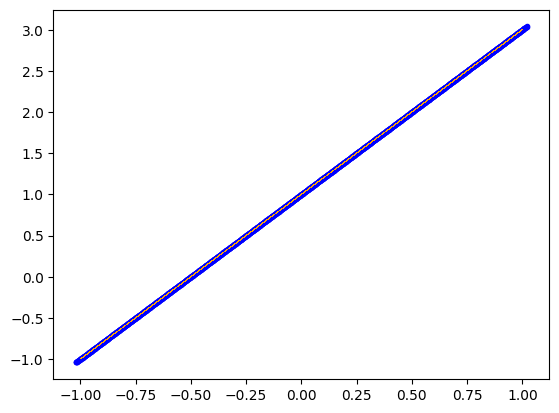

In [141]:
plt.figure()
plt.plot(x_train_np, y_train_np, '.', color='blue')
plt.plot(x_eval_np, y_eval_np, ',', color='orange')
plt.show()

In [196]:
reg_dim = 1
n_hidden = 20
lr = 1e-3

model = NeuralNetStage(1, reg_dim, n_hidden, kappa=1, lt=lt, ut=ut)
params = model.parameters()

optim = torch.optim.Adam(params, lr)
criterion = nn.MSELoss()

In [197]:
lossi = []
max_steps = 3000
model.reset_parameters()

for i in range(max_steps):
    inputs = Variable(x_train)
    labels = Variable(y_train)
    optim.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optim.step()

    if i % 1000 == 0:
        print(f'{i:7d}/{max_steps:4d}: {loss.item():.4f}')
        
    lossi.append(loss.item())

      0/3000: 1.9597
   1000/3000: 0.0018
   2000/3000: 0.0002


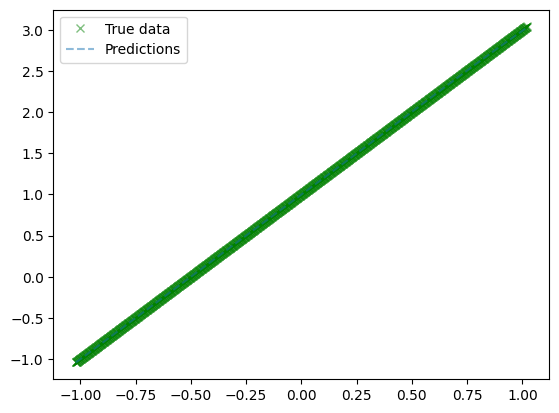

In [199]:
predicted = model(Variable(x_train))

plt.clf()
plt.plot(x_train, y_train, 'gx', label='True data', alpha=0.5)
plt.plot(x_train, predicted.detach().numpy(), '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()